In [1]:
import numpy as np

In [2]:
# load data

data = np.load("./")

emb = data['emb']
coords = data['coords']

In [3]:
# ============ 3.1) KMeans on embedding + visualize ============
import matplotlib.pyplot as plt#

# 1) Choose number of clusters (modifiable)
K = 15

# 2) Fit KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=K, n_init=10, random_state=0)
labels = km.fit_predict(emb)   # u_train: [N,2]
centers = km.cluster_centers_

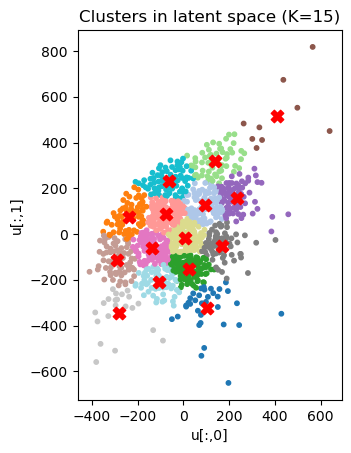

In [5]:
# 4) Visualization: latent space (u_train)
plt.figure()
plt.scatter(emb[:, 0], emb[:, 1], s=10, c=labels, cmap="tab20")  # No cmap specified, follow default
plt.scatter(centers[:, 0], centers[:, 1], s=80, marker="X", c="red")  # Cluster centers (default style)
plt.gca().set_aspect("equal", adjustable="box")
plt.title(f"Clusters in latent space (K={K})")
plt.xlabel("u[:,0]")
plt.ylabel("u[:,1]")
plt.show()

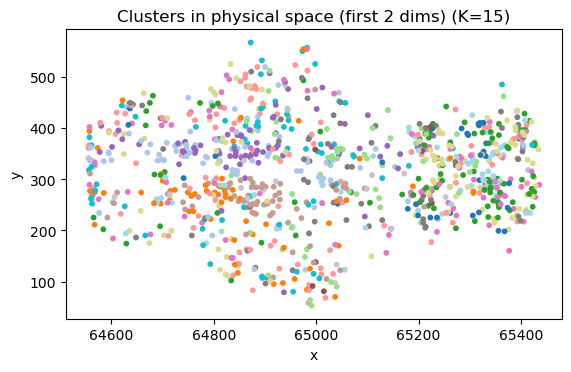

In [6]:
# 5) Visualization: physical space (coords)
coords_plot = None
try:
    import torch
    if "coords" in globals() and coords is not None:
        coords_plot = coords.detach().cpu().numpy() if torch.is_tensor(coords) else np.asarray(coords)
    elif "coords_np" in globals():
        coords_plot = np.asarray(coords)
except NameError:
    pass

if coords_plot is not None and coords_plot.ndim == 2 and coords_plot.shape[1] >= 2:
    plt.figure()
    plt.scatter(coords_plot[:, 0], coords_plot[:, 1], s=10, c=labels, cmap="tab20")  # Default colormap
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(f"Clusters in physical space (first 2 dims) (K={K})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
else:
    print("[info] No valid coords / coords_np found (or dimension <2), skip physical space visualization.")

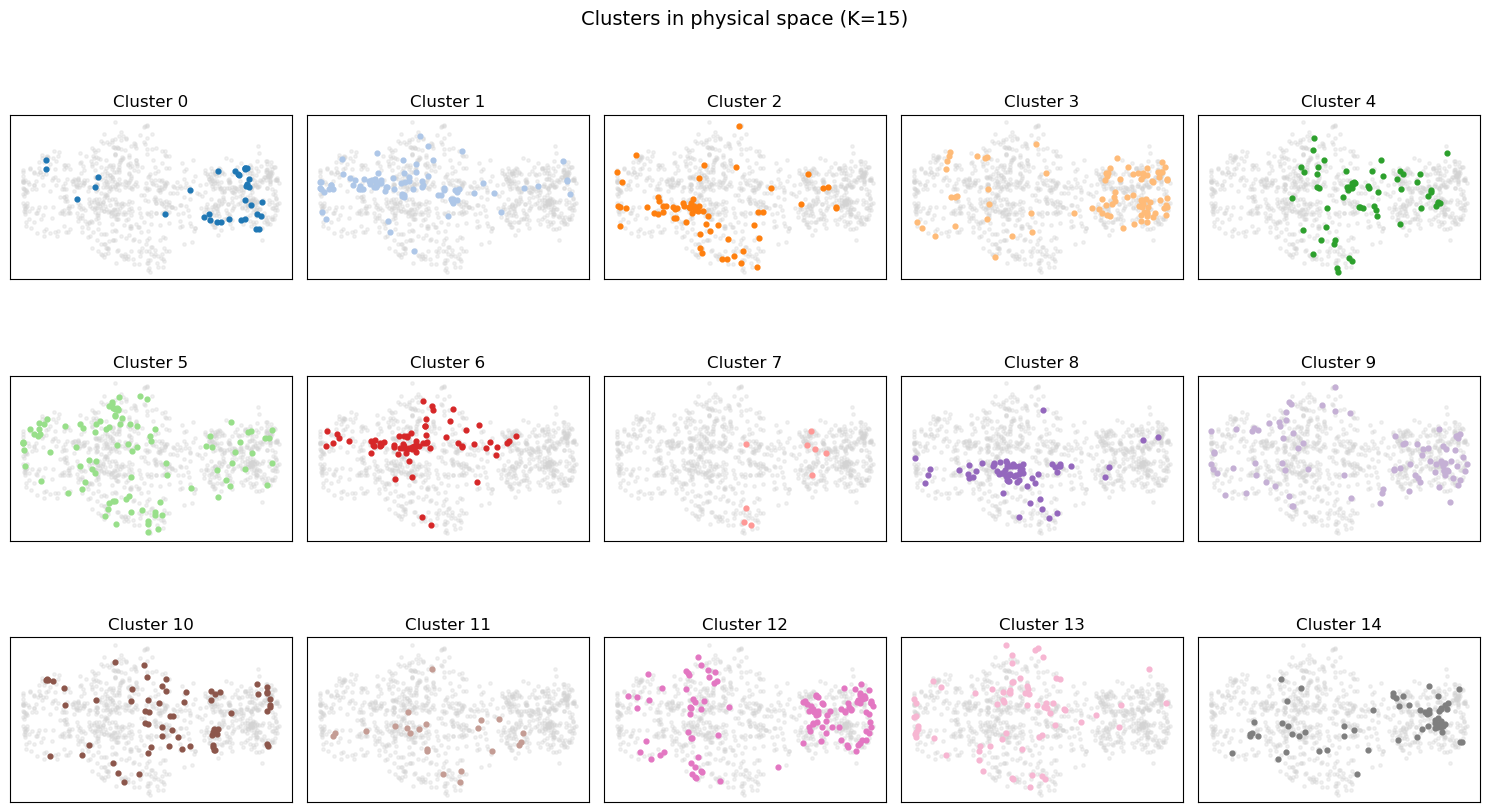

In [7]:
import math
import matplotlib.pyplot as plt

if coords_plot is not None and coords_plot.ndim == 2 and coords_plot.shape[1] >= 2:
    K = int(labels.max()) + 1
    tab = plt.get_cmap("tab20").colors

    ncols = 5
    nrows = math.ceil(K / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()

    for k in range(K):
        ax = axes[k]
        ax.scatter(coords_plot[:, 0], coords_plot[:, 1],
                   s=6, c="#d3d3d3", alpha=0.3)
        mask = (labels == k)
        ax.scatter(coords_plot[mask, 0], coords_plot[mask, 1],
                   s=12, c=[tab[k % len(tab)]])
        ax.set_title(f"Cluster {k}")
        ax.set_aspect("equal", adjustable="box")
        ax.set_xticks([]); ax.set_yticks([])

    for j in range(K, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Clusters in physical space (K={K})", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("[info] No valid coords / coords_np found (or dim < 2).")
